<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | Python: Programação Orientada a Objetos
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [4]:
!pip install wget==3.2

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=02f605d91dba565da18ed47f2a077459c05f372aafd3da8c1eef6f87f6970241
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [5]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [6]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [7]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [ ]:
!pip install pandas==1.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.1.5-cp310-cp310-linux_x86_64.whl size=33253637 sha256=8ea77c452a6e9be81440b7c6dead769a77489bc51a45f7d15ae31d94540851ed
  Stored in directory: /root/.cache/pip/wheels/92/41/92/769e05cd303040fdae625c9f5a8d38f1d37c423aa2a30b3d0d
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.1.5 which is incompatible.
bokeh 3.1.1 requires pandas>=1.2, but you have pandas 1.1.5 which is incomp

Vamos importar o pacote com o apelido (alias) `pd`.

In [8]:
import pandas as pd

Estamos prontos para ler o arquivo.

In [9]:
df = pd.read_csv('./dados/dow_jones_index.csv')

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [10]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [11]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [12]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [13]:
df_mcd = df[df['stock'] == 'MCD']

 - Selecionando apenas as colunas de data e valores de ações.

In [14]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [15]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [ ]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [16]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [ ]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [ ]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [17]:
# extração e tratamento dos dados da empresa Coca-Cola.

In [22]:
import pandas as pd

# Filtrar as linhas onde a coluna stock é igual a "KO"
coca_cola_df = df[df['stock'] == 'KO']

# Exibir o dataframe resultante
df.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('./dados/dow_jones_index.csv')

# Filtrar as linhas onde a coluna stock é igual a "KO" (Coca-Cola)
coca_cola_df = df[df['stock'] == 'KO']

# Selecionar apenas as colunas de data e valores de abertura, fechamento, máximo e mínimo
coca_cola_values = coca_cola_df[['date', 'open', 'close', 'high', 'low']]

# Exibir as n primeiras linhas do dataframe resultante
print(coca_cola_values.head)

<bound method NDFrame.head of           date    open   close    high     low
204   1/7/2011  $65.88  $62.92  $65.88  $62.56
205  1/14/2011  $62.70  $63.13  $63.86  $62.56
206  1/21/2011  $63.21  $62.77  $63.92  $62.72
207  1/28/2011  $62.87  $62.21  $63.31  $62.14
208   2/4/2011  $62.32  $62.56  $63.48  $61.89
209  2/11/2011  $62.67  $63.57  $64.75  $62.32
210  2/18/2011  $63.67  $64.55  $64.72  $62.55
211  2/25/2011  $63.36  $64.31  $64.40  $63.33
212   3/4/2011  $64.17  $65.21  $65.87  $63.86
213  3/11/2011  $65.32  $64.81  $65.84  $64.47
214  3/18/2011  $64.34  $62.70  $64.61  $61.29
215  3/25/2011  $63.13  $65.22  $65.39  $63.05
581   4/1/2011  $65.20  $67.22  $67.48  $65.03
582   4/8/2011  $67.22  $67.27  $67.82  $66.86
583  4/15/2011  $67.25  $68.01  $68.47  $66.41
584  4/21/2011  $67.57  $67.88  $68.05  $66.64
585  4/29/2011  $67.95  $67.46  $67.98  $65.81
586   5/6/2011  $67.76  $66.90  $67.93  $66.40
587  5/13/2011  $66.86  $68.18  $68.77  $66.83
588  5/20/2011  $68.10  $68.30

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [23]:
# Visualize os dados do dataframe
df.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [27]:
# Verifique o tipo dos dados
print(coca_cola_df.dtypes)


quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object


Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [30]:
import pandas as pd

# Função lambda para remover o caractere "$" e converter para float
remove_dollar_and_convert_to_float = lambda x: float(x.replace('$', ''))

# Aplicar a função lambda nas colunas de abertura, fechamento, máximo e mínimo
coca_cola_df['open'] = coca_cola_df['open'].apply(remove_dollar_and_convert_to_float)
coca_cola_df['close'] = coca_cola_df['close'].apply(remove_dollar_and_convert_to_float)
coca_cola_df['high'] = coca_cola_df['high'].apply(remove_dollar_and_convert_to_float)
coca_cola_df['low'] = coca_cola_df['low'].apply(remove_dollar_and_convert_to_float)

# Verificar os tipos dos dados após a conversão
print(coca_cola_df.dtypes)


quarter                                 int64
stock                                  object
date                                   object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object


<ipython-input-30-505e23699eb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_cola_df['open'] = coca_cola_df['open'].apply(remove_dollar_and_convert_to_float)
<ipython-input-30-505e23699eb2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_cola_df['close'] = coca_cola_df['close'].apply(remove_dollar_and_convert_to_float)
<ipython-input-30-505e23699eb2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Verifique novamente os dados e seus tipos.

In [ ]:
# Visualize novamente os dados do dataframe
print(coca_cola_values)

          date   open  close   high    low
204   1/7/2011  65.88  62.92  65.88  62.56
205  1/14/2011  62.70  63.13  63.86  62.56
206  1/21/2011  63.21  62.77  63.92  62.72
207  1/28/2011  62.87  62.21  63.31  62.14
208   2/4/2011  62.32  62.56  63.48  61.89
209  2/11/2011  62.67  63.57  64.75  62.32
210  2/18/2011  63.67  64.55  64.72  62.55
211  2/25/2011  63.36  64.31  64.40  63.33
212   3/4/2011  64.17  65.21  65.87  63.86
213  3/11/2011  65.32  64.81  65.84  64.47
214  3/18/2011  64.34  62.70  64.61  61.29
215  3/25/2011  63.13  65.22  65.39  63.05
581   4/1/2011  65.20  67.22  67.48  65.03
582   4/8/2011  67.22  67.27  67.82  66.86
583  4/15/2011  67.25  68.01  68.47  66.41
584  4/21/2011  67.57  67.88  68.05  66.64
585  4/29/2011  67.95  67.46  67.98  65.81
586   5/6/2011  67.76  66.90  67.93  66.40
587  5/13/2011  66.86  68.18  68.77  66.83
588  5/20/2011  68.10  68.30  68.70  67.50
589  5/27/2011  67.59  66.51  67.90  66.30
590   6/3/2011  66.94  65.53  67.24  65.21
591  6/10/2

In [ ]:
# Verifique novamente o tipo dos dados
print(coca_cola_values.dtypes)

date      object
open     float64
close    float64
high     float64
low      float64
dtype: object


Excelente, agora podemos explorar os dados visualmente.

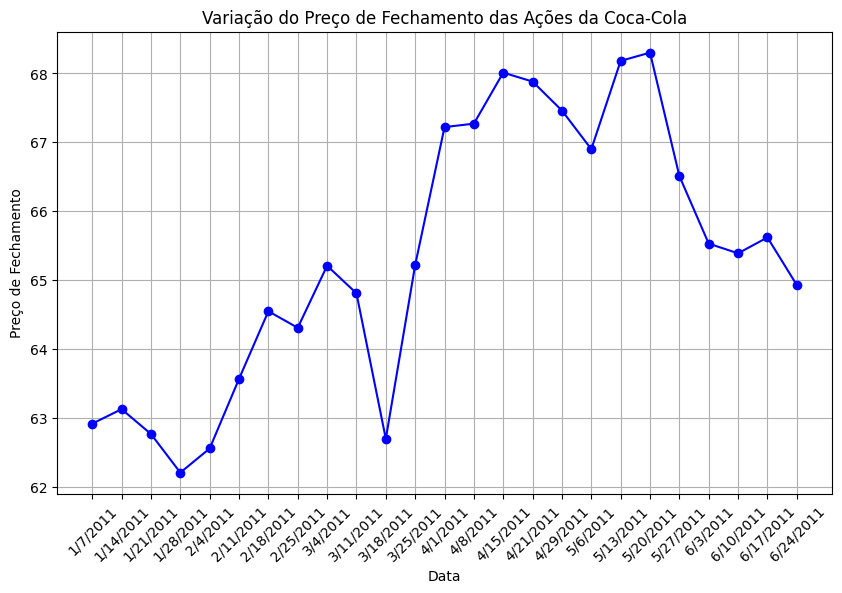

In [ ]:
import matplotlib.pyplot as plt

# Plotar gráfico de linhas para a variação do preço de fechamento
plt.figure(figsize=(10, 6))
plt.plot(coca_cola_values['date'], coca_cola_values['close'], marker='o', linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Variação do Preço de Fechamento das Ações da Coca-Cola')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


Vamos importar o pacote com o apelido (alias) `sns`.

In [31]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-16-1af5daa54bb0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


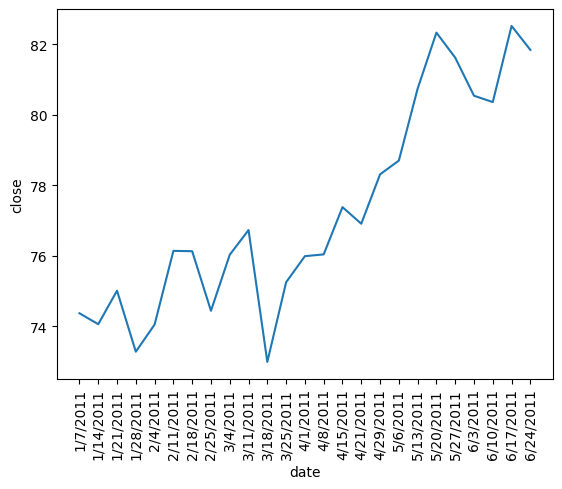

In [ ]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

<ipython-input-17-754274876e32>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


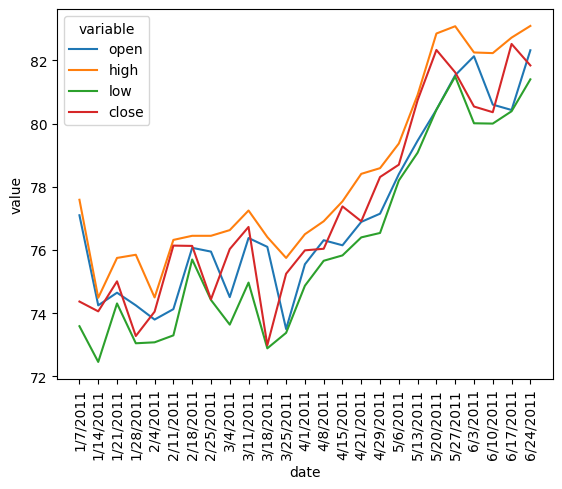

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plot.figure.savefig("./mcd.png")

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

<ipython-input-15-8b0c7c2ee422>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=coca_cola_values['date'], rotation=90)


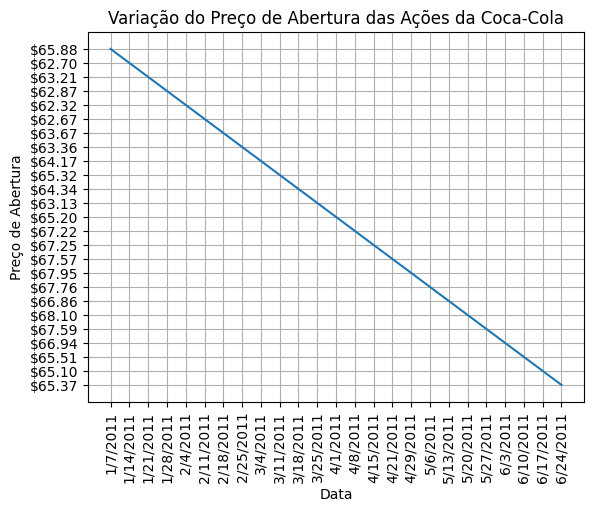

In [ ]:
# visualização dos dados da Coca-Cola.
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa para selecionar as colunas relevantes do dataframe da Coca-Cola
# Substitua 'df' pelo nome correto do dataframe que contém os dados da empresa Coca-Cola
coca_cola_values = df[df['stock'] == 'KO'][['date', 'open']]

# Criar o gráfico de variação do preço de abertura das ações da Coca-Cola
plot = sns.lineplot(x="date", y="open", data=coca_cola_values)
_ = plot.set_xticklabels(labels=coca_cola_values['date'], rotation=90)

plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.title('Variação do Preço de Abertura das Ações da Coca-Cola')
plt.grid(True)

# Salvar a imagem como 'ko.png'
plt.savefig('ko.png')

# Exibir o gráfico
plt.show()



Vamos visualizar os valores de abertura das ações ao longo do tempo.

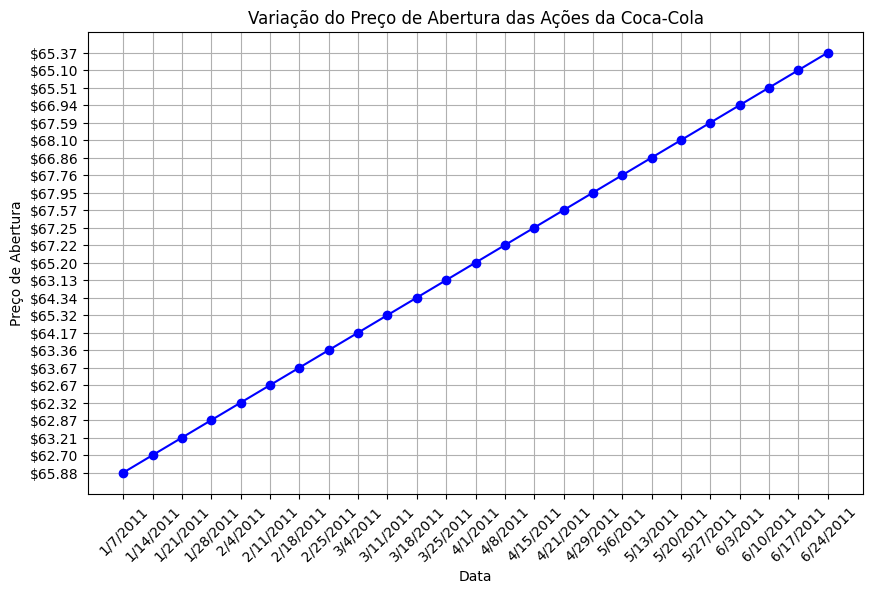

In [ ]:
import matplotlib.pyplot as plt

# Substitua 'coca_cola_values' pelo nome correto do dataframe que contém os dados da empresa Coca-Cola
plt.figure(figsize=(10, 6))
plt.plot(coca_cola_values['date'], coca_cola_values['open'], marker='o', linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.title('Variação do Preço de Abertura das Ações da Coca-Cola')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

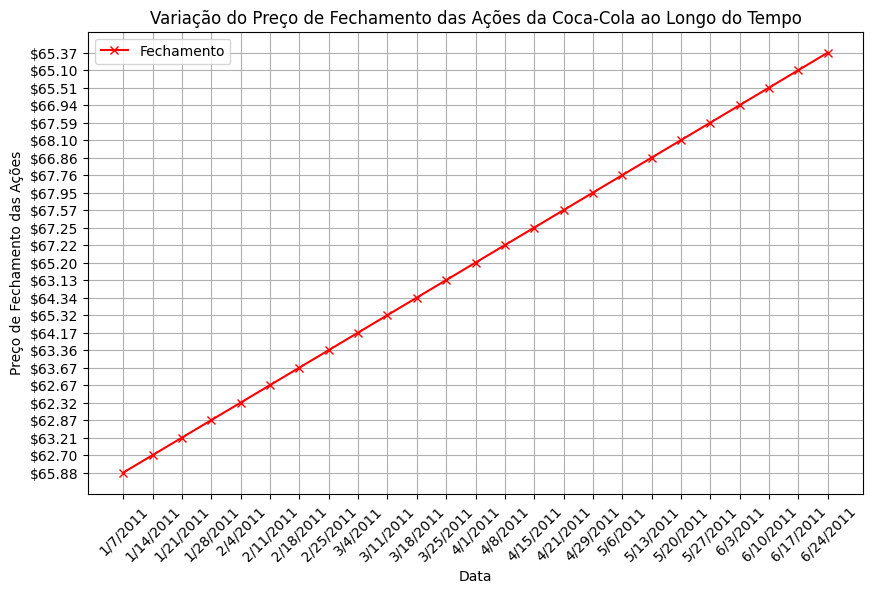

In [ ]:
import matplotlib.pyplot as plt

# Substitua 'coca_cola_values' pelo nome correto do dataframe que contém os dados da empresa Coca-Cola
plt.figure(figsize=(10, 6))
plt.plot(coca_cola_values['date'], coca_cola_values['open'], marker='x', linestyle='-', color='r', label='Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento das Ações')
plt.title('Variação do Preço de Fechamento das Ações da Coca-Cola ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

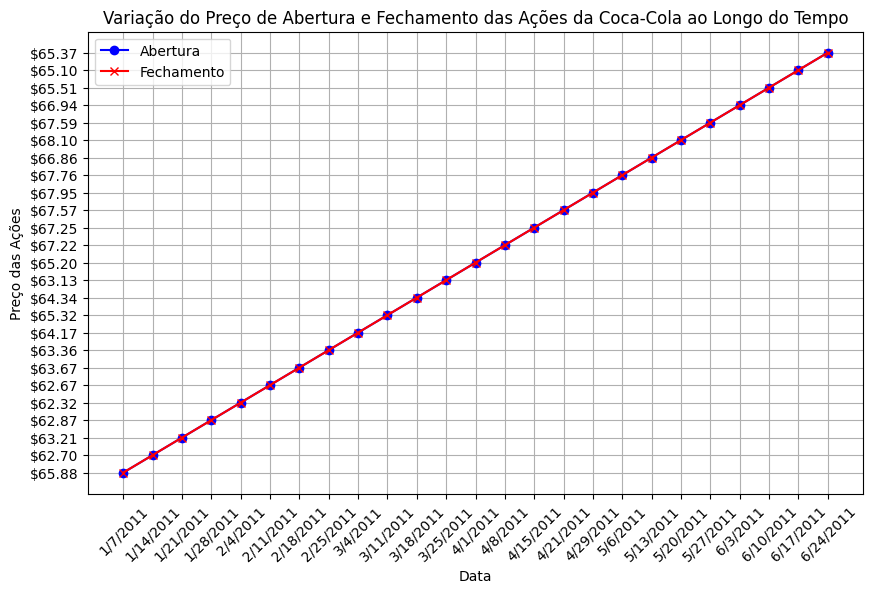

In [ ]:
import matplotlib.pyplot as plt

# Substitua 'coca_cola_values' pelo nome correto do dataframe que contém os dados da empresa Coca-Cola

plt.figure(figsize=(10, 6))

# Plot dos valores de abertura
plt.plot(coca_cola_values['date'], coca_cola_values['open'], marker='o', linestyle='-', color='b', label='Abertura')

# Plot dos valores de fechamento
plt.plot(coca_cola_values['date'], coca_cola_values['open'], marker='x', linestyle='-', color='r', label='Fechamento')

plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.title('Variação do Preço de Abertura e Fechamento das Ações da Coca-Cola ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plt.savefig('coca_cola_stock_prices.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

**Insight #1**: ...

Bom, o que pude notar foi que aconteceu flutuações dos preços inicias. O preço das ações da Coca-Cola teve uma variação notável durante o período mencionado. Começou em 65.88 em 1/07/2011 e caiu para 62.70 em 1/14/2011, uma queda de aproximadamente 5%.Nos dias subsequentes, os preços continuaram a flutuar, indicando uma possível instabilidade no mercado ou influências externas que estavam afetando o valor das ações. A análise das flutuações nos preços das ações ao longo do tempo mostra um padrão de variação contínua,com momentos de aumento seguidos por momentos de queda e estabilização. Isso pode indicar um ambiente de mercado volátil ou a influência de fatores externos. Em resumo, o pico de preço em 5/20/2011 e a subsequente queda até o fechamento em 6/24/2011 destacam um período de volatilidade e variação nos preços das ações da Coca-Cola. Isso demonstra como fatores diversos podem impactar os preços das ações, levando a diferentes tendências ao longo do tempo.







---